In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("/content/Cancer.csv")
print(len(data))
print(data.columns)

569
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [3]:
# Drop unnecessary column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
print(data['Unnamed: 32'].isna().count())
data = data.drop(columns=['Unnamed: 32'])

569


In [4]:
print(data.isna().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
# Drop the 'id' column
data = data.drop(columns=['id'])

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 455
Testing set size: 114


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/content/Cancer.csv")

# Preprocess the data
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data = data.drop(columns=['Unnamed: 32', 'id'])

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature Selection

## Low Variance Filter
lv_filter = VarianceThreshold(threshold=0.01)  # Adjust the threshold as needed
X_train_lv = lv_filter.fit_transform(X_train)
X_test_lv = lv_filter.transform(X_test)

## Univariate Feature Selection - Chi-squared
# Only works for classification tasks
k_cnt = 10  # Number of top features to select
select_chi2 = SelectKBest(chi2, k=k_cnt)
X_train_chi2 = select_chi2.fit_transform(X_train, y_train)
X_test_chi2 = select_chi2.transform(X_test)

# Train and evaluate the model with selected features

## Random Forest Classifier with Low Variance Filter
rf_model_lv = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_lv.fit(X_train_lv, y_train)
y_pred_rf_lv = rf_model_lv.predict(X_test_lv)
accuracy_rf_lv = accuracy_score(y_test, y_pred_rf_lv)
print("Random Forest Accuracy with Low Variance Filter:", accuracy_rf_lv)

## Random Forest Classifier with Univariate Feature Selection
rf_model_chi2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_chi2.fit(X_train_chi2, y_train)
y_pred_rf_chi2 = rf_model_chi2.predict(X_test_chi2)
accuracy_rf_chi2 = accuracy_score(y_test, y_pred_rf_chi2)
print("Random Forest Accuracy with Univariate Feature Selection (Chi-squared):", accuracy_rf_chi2)

Random Forest Accuracy with Low Variance Filter: 0.9649122807017544
Random Forest Accuracy with Univariate Feature Selection (Chi-squared): 0.956140350877193


In [7]:
# Get the indices of selected features with low variance filter
selected_features_lv_idx = lv_filter.get_support(indices=True)

# Map the indices to the original feature names
selected_features_lv = X.columns[selected_features_lv_idx]

# Print the selected features
print("Selected Features with Low Variance Filter:")
print(selected_features_lv)

Selected Features with Low Variance Filter:
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concave points_se', 'symmetry_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
# Get the indices of selected features with univariate feature selection (Chi-squared)
selected_features_chi2_idx = select_chi2.get_support(indices=True)

# Map the indices to the original feature names
selected_features_chi2 = X.columns[selected_features_chi2_idx]

# Print the selected features
print("Selected Features with Univariate Feature Selection (Chi-squared):")
print(selected_features_chi2)

Selected Features with Univariate Feature Selection (Chi-squared):
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_dt)))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Decision Tree Accuracy: 0.95


In [14]:
# Decision Tree with Cross-Validation
start_ts = time.time()
clf_dt = DecisionTreeClassifier(random_state=42)
scores_dt = cross_validate(clf_dt, data_np, target_np, scoring=scorers, cv=5)

scores_Acc_dt = scores_dt['test_Accuracy']
print("Decision Tree Acc: %0.2f (+/- %0.2f)" % (scores_Acc_dt.mean(), scores_Acc_dt.std() * 2))

scores_AUC_dt = scores_dt['test_roc_auc']
print("Decision Tree AUC: %0.2f (+/- %0.2f)" % (scores_AUC_dt.mean(), scores_AUC_dt.std() * 2))
print("Decision Tree CV Runtime:", time.time() - start_ts)

Decision Tree Acc: 0.92 (+/- 0.05)
Decision Tree AUC: 0.92 (+/- 0.04)
Decision Tree CV Runtime: 0.07785677909851074


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_rf)))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Random Forest Accuracy: 0.96


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import time

# Prepare data (assuming X_scaled and y are already defined)
data_np = X_scaled
target_np = y

# Setup cross-validation scorers
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc'}

# Cross-validation with Random Forest
start_ts = time.time()
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3,
                             criterion='entropy', random_state=42)
scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)

# Results
scores_Acc = scores['test_Accuracy']
print("Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))

scores_AUC = scores['test_roc_auc']
print("Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))
print("CV Runtime:", time.time() - start_ts)

Random Forest Acc: 0.97 (+/- 0.03)
Random Forest AUC: 0.99 (+/- 0.01)
CV Runtime: 1.424900770187378


Feature Importance:
 area_worst                 0.153892
concave points_worst       0.144663
concave points_mean        0.106210
radius_worst               0.077987
concavity_mean             0.068001
perimeter_worst            0.067115
perimeter_mean             0.053270
radius_mean                0.048703
area_mean                  0.047555
concavity_worst            0.031802
area_se                    0.022407
texture_worst              0.021749
compactness_worst          0.020266
radius_se                  0.020139
compactness_mean           0.013944
texture_mean               0.013591
perimeter_se               0.011303
smoothness_worst           0.010644
symmetry_worst             0.010120
concavity_se               0.009386
smoothness_mean            0.007285
fractal_dimension_se       0.005321
compactness_se             0.005253
fractal_dimension_worst    0.005210
texture_se                 0.004724
smoothness_se              0.004271
symmetry_se                0.004018
fractal

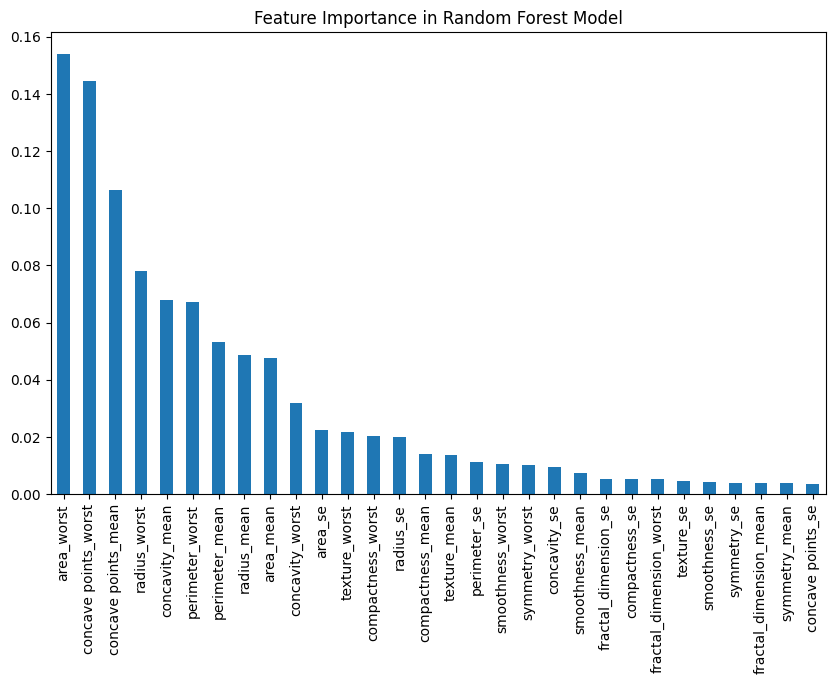

In [15]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Feature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters for Decision Tree:", best_params)

Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Decision Tree Accuracy: 0.95


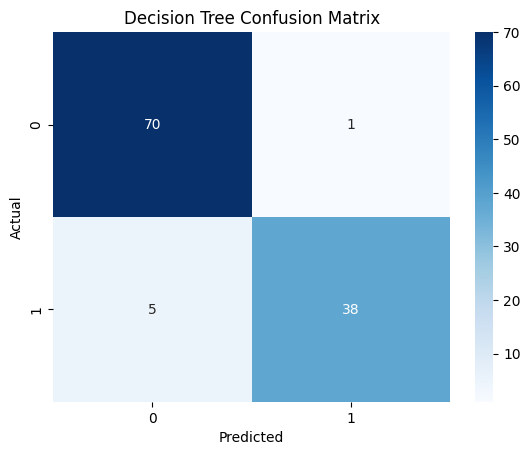

Decision Tree Cross-Validation Accuracy: 0.92 (+/- 0.05)
Decision Tree Cross-Validation AUC: 0.92 (+/- 0.04)
Random Forest Cross-Validation Accuracy: 0.95 (+/- 0.04)
Random Forest Cross-Validation AUC: 0.99 (+/- 0.01)
Feature Importance:
 area_worst                 0.153892
concave points_worst       0.144663
concave points_mean        0.106210
radius_worst               0.077987
concavity_mean             0.068001
perimeter_worst            0.067115
perimeter_mean             0.053270
radius_mean                0.048703
area_mean                  0.047555
concavity_worst            0.031802
area_se                    0.022407
texture_worst              0.021749
compactness_worst          0.020266
radius_se                  0.020139
compactness_mean           0.013944
texture_mean               0.013591
perimeter_se               0.011303
smoothness_worst           0.010644
symmetry_worst             0.010120
concavity_se               0.009386
smoothness_mean            0.007285
fract

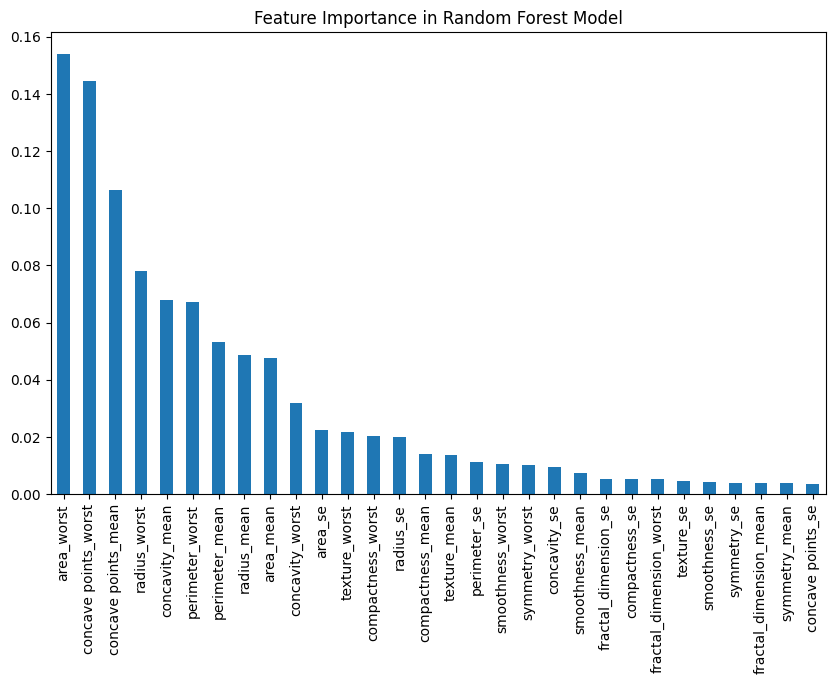

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Cancer.csv")

# Preprocess the data
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data = data.drop(columns=['Unnamed: 32', 'id'])

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters for Decision Tree:", best_params)

# Train Decision Tree with best parameters
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train, y_train)

# Evaluate the Decision Tree model
y_pred_dt = best_dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_dt)))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-Validation for Decision Tree and Random Forest
clf_dt = DecisionTreeClassifier(random_state=42)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

scorers = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc'}

scores_dt = cross_validate(clf_dt, X_scaled, y, scoring=scorers, cv=5)
scores_rf = cross_validate(clf_rf, X_scaled, y, scoring=scorers, cv=5)

print("Decision Tree Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(scores_dt['test_accuracy'].mean(), scores_dt['test_accuracy'].std() * 2))
print("Decision Tree Cross-Validation AUC: {:.2f} (+/- {:.2f})".format(scores_dt['test_roc_auc'].mean(), scores_dt['test_roc_auc'].std() * 2))

print("Random Forest Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(scores_rf['test_accuracy'].mean(), scores_rf['test_accuracy'].std() * 2))
print("Random Forest Cross-Validation AUC: {:.2f} (+/- {:.2f})".format(scores_rf['test_roc_auc'].mean(), scores_rf['test_roc_auc'].std() * 2))

# Feature Importance from Random Forest
clf_rf.fit(X_train, y_train)
importances = clf_rf.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Feature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Random Forest Model')
plt.show()